In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import h5py
import inspect
from tqdm import tqdm
import sys
import math
import presto
from presto import lockin, utils, hardware
from presto.hardware import AdcFSample, AdcMode, DacFSample, DacMode

In [3]:
# Load Exp Data
def load_ExpData(file_, idx_str_):
    # Open hdf5 file
    with h5py.File(file_, "r") as dataset:
        # Data
        return dict(freq_comb=np.asarray(dataset[idx_str_]["freq comb"]),
                    freq_pump=np.asarray(dataset[idx_str_]["freq pumps"]),
                    pump_pwr_data=np.asarray(dataset[idx_str_]["pump pwr sweep"]),
                    pump_phase_data=np.asarray(dataset[idx_str_]["pump phase sweep"]),
                    df=np.asarray(dataset[idx_str_]["df"]),
                    USB=np.asarray(dataset[idx_str_]["USB"]),
                    )

In [33]:

file = r'/run/user/1000/doc/1ab65f9e/2025-11.hdf5'
run = r'Resonance - Amplitude Sweep/2025-11-19_17_15_24/'


resonance= load_ExpData(
    file_ = file,
    idx_str_= run
    )['USB']
resonance=np.array(resonance)

freqs = load_ExpData(
    file_ = file,
    idx_str_= run
    )['freq_comb']

df = load_ExpData(
    file_ = file,
    idx_str_= run
    )['df'] / 1e6


In [37]:
print(np.shape(resonance))

(9, 95)


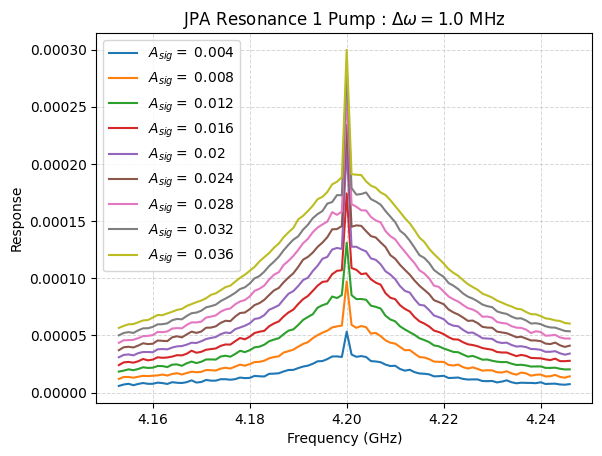

In [44]:
fig, ax = plt.subplots()

# Plot
for idx in range(len(resonance)):

    ax.plot(
        freqs/1e9, 
        np.abs(resonance[idx][:-1]), 
        label= '$A_{sig} = $ ' + str(np.round(0.004 * (idx +1), 3))
        )   # Amp = 0.01


ax.set_title(
    f'JPA Resonance 1 Pump : $\\Delta \\omega = ${df} MHz'
    )   

# Additional
ax.legend()
ax.grid(ls='--', lw=0.7, alpha=0.5)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Response')

# Save plot
fig.savefig(
    f"Figures/JPA_Res_{df}_amp_sweep_9.png", 
    dpi=300, 
    bbox_inches="tight"
    )
plt.show()